<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Basic-Stats-/-Prelim-Analysis" data-toc-modified-id="Basic-Stats-/-Prelim-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Basic Stats / Prelim Analysis</a></span></li><li><span><a href="#Key-Points-of-interest" data-toc-modified-id="Key-Points-of-interest-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Key Points of interest</a></span></li><li><span><a href="#Piloting-code" data-toc-modified-id="Piloting-code-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Piloting code</a></span><ul class="toc-item"><li><span><a href="#Counts" data-toc-modified-id="Counts-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Counts</a></span></li></ul></li></ul></div>

# Data

* Every comment ever made in the subreddit
* Minimal variables needed: author, date
* Then get all comments across the site for those authors


# Basic Stats / Prelim Analysis

* num of authors, comments (per month)
* num of comments per author, num of days between first and last posts per author
* % all author's comments in the subreddit
* num of new authors, num of last comments by author (per month)
* frequency of other subreddits commented in --> co-commenting subreddit network
    * subset of authors who comment in both TD & CMV
    * shorted path(s) between TD * CMV


# Key Points of interest

* Are authors more persistent in TD?
    * Expect that many authors only enter subreddit briefly, encouraged by offline events (Hogan 2017)
    * But there should be a fairly large persistent, highly active group in TD
        * More so in TD than CMV because of the lack of care needed in making posts, the effort of developing understanding of group norms and sense of id - have invested time in learning the space
    * Expect many persistent authors in CMV - but who post less frequentely, or with large intervals
        * Similarly invested time in understanding subreddit behaviour policies. Commenting in CMV suggests a conscientiousness - interested in well thought out arguements to inform people
        * However each comment in CMV is more takes more time and though than those in CMV
        * And given the disparate topics covered expect many authors to only engage intermettiently as topics that rouse there interest are discussed
* Do authors enage with other parts of reddit?
    * Expect CMV users to be active elsewhere because unlikely to have come across CMV anywhere than already on the platform - also arguing on the internet in one place suggests interest in it elsewhere
        * Believe CMV co-commenting subreddit network with show disparate topics as they are only united to form not content - the anti-echo chamber effect
    * TD users may hear of the subreddit from off reddit and come for it
        * *to check this see if those who post briefly around time of offline event engage anywhere else in the system*
            * nb these people not nec part of the echo chamber but come to criticise it
        * given the antagonistic relationship between TD and the rest of reddit expect that TD authors will self-confine to certain types of subreddits - or only engage in antagonistic ones to antagonise
            * get references for subreddits that ban TD authors from posting in?
        * thus the echo chamber effect would happen for substantative and relationship reasons - both push and pull factors
        
        
# Piloting code

* Select a partial sample for one sub for one month
* Sample by day instead of month
* Test all code
* Should then easily transfer to other sub and scale to all months

## Counts

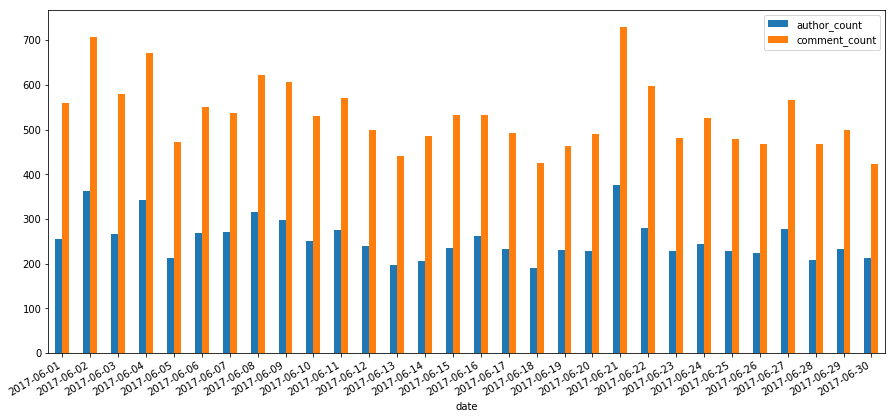

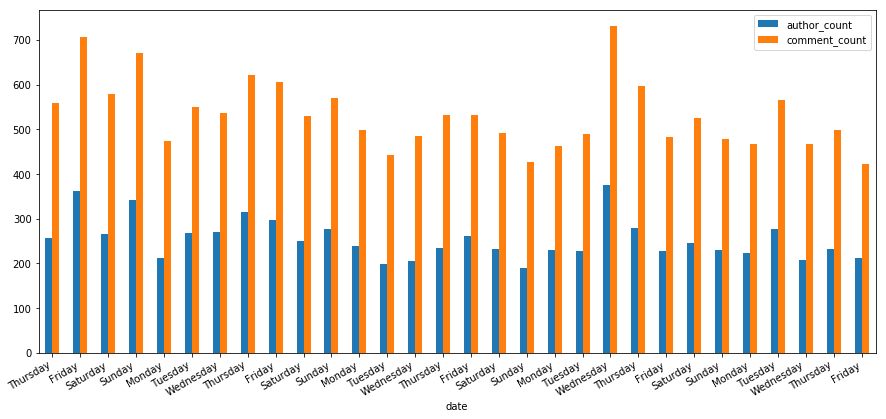

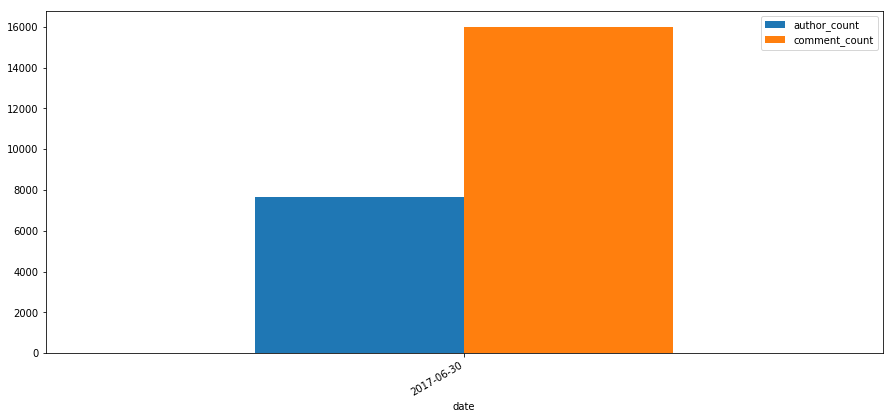

In [4]:
'''Pilot code on TD partial month sample'''
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
% matplotlib inline

sub = 'td'
df = pd.read_csv('{}_sample.csv'.format(sub))

def daily_counts(df):
    df['date'] = pd.to_datetime(df['created_utc'], unit='s')
    daily_comments = df.set_index('date').resample('d').size()
    daily_authors = df.drop_duplicates('author').set_index('date').resample('d').size()

    daily_counts = pd.DataFrame({'author_count': daily_authors, 'comment_count': daily_comments})
    
    return daily_counts

def plot_daily_counts(df, sub):
    fig, ax = plt.subplots(figsize=(15,7))
    df.plot(kind='bar', ax=ax)
    ax.set_xticklabels(df.index.date)
    fig.autofmt_xdate()
    plt.savefig('{}_daily_counts.png'.format(sub))


def plot_dow_counts(df, sub):
    dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
    df['dow'] = df.index.dayofweek
    df['dow'] = df['dow'].map(dayOfWeek)
    
    fig, ax = plt.subplots(figsize=(15,7))
    df.plot(kind='bar', ax=ax)
    ax.set_xticklabels(df.dow)
    fig.autofmt_xdate()
    plt.savefig('{}_dow_counts.png'.format(sub))

    
def monthly_counts(df):
    df['date'] = pd.to_datetime(df['created_utc'], unit='s')
    monthly_comments = df.set_index('date').resample('M').size()
    monthly_authors = df.drop_duplicates('author').set_index('date').resample('M').size()

    monthly_counts = pd.DataFrame({'author_count': monthly_authors, 'comment_count': monthly_comments})
    
    return monthly_counts

def plot_monthly_counts(df, sub):
    fig, ax = plt.subplots(figsize=(15,7))
    df.plot(kind='bar', ax=ax)
    ax.set_xticklabels(df.index.date)
    fig.autofmt_xdate()
    plt.savefig('{}_monthly_counts.png'.format(sub))


daily_counts = daily_counts(df)
plot_daily_counts(daily_counts, sub)

plot_dow_counts(daily_counts, sub)

monthly_counts = monthly_counts(df)
plot_monthly_counts(monthly_counts, sub)



In [ ]:
'''Pilot code on TD partial month sample'''
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
% matplotlib inline

sub = 'td'
df = pd.read_csv('{}_sample.csv'.format(sub))

firsts = df.drop_duplicates('author', keep='first', inplace=False).sort_values('author')
lasts = df.drop_duplicates('author', keep='last', inplace=False).sort_values('author')

firsts.head()
lasts.head()

hist = pd.merge(firsts, lasts, how='outer', on='author')
singles = hist[hist['body_x']==hist['body_y']]

print('There are {} unique authors and {} made only 1 comment in the period'.format(hist.shape[0], singles.shape[0]))

dates = hist[['created_utc_x','created_utc_y']]

In [3]:
import pandas as pd

print('Opening full comment files...')
cmv = pd.read_pickle('cmv-17-06-cocomments.pkl')
td = pd.read_pickle('td-17-06-cocomments.pkl')

print('Opening ego comment files...')
cmv_comments = pd.read_csv('cmv_sample.csv')
td_comments = pd.read_csv('td_sample.csv')

def sub_counts(df):
    sub_counts = df['subreddit'].value_counts()
    sub_counts = pd.DataFrame(sub_counts).rename({'subreddit':'count'})
    sub_counts['portion'] = sub_counts['subreddit'] / sub_counts['subreddit'].sum()
    
    return sub_counts
    
#cmv_counts = sub_counts(cmv)

print('Prepping data...')
cmv_names = list(cmv['author'].unique())
td_names = list(td['author'].unique())
cmv_subs = list(cmv['subreddit'].unique())
td_subs = list(td['subreddit'].unique())

shared_authors = [name for name in cmv_names if name in td_names]
shared_subreddits = [subreddit for subreddit in cmv_subs if subreddit in td_subs]

cmv_shared = cmv[cmv['author'].isin(shared_authors)]
td_shared = td[td['author'].isin(shared_authors)]

print('Getting union comments...')
union = pd.merge(cmv, td, how='inner')
remove = ['[deleted]','AutoModerator', 'WikiTextBot','teddyRbot']
botless = union[~union['author'].isin(remove)]

print('Done!')

Opening full comment files...
Opening ego comment files...
Prepping data...


KeyboardInterrupt: 

In [1]:
print('TD has', len(td_names),'authors and', len(td_subs),'subreddits')
print()
print('CMV has', len(cmv_names),'authors and', len(cmv_subs),'subreddits')
print()
print('There are', len(shared_authors), 'shared authors and', len(shared_subreddits), 'shared subreddits')
print()
print('CMV has', cmv.shape[0], 'total comments and', cmv_shared.shape[0], 'by TD authors')
print()
print('TD has', td.shape[0], 'total comments and', td_shared.shape[0], 'by TD authors')
print()

if sorted(cmv_comments['author'].unique()) != sorted(cmv_names):
    print('Wrong number of CMV authors! :/')

if sorted(td_comments['author'].unique()) == sorted(td_names):
    print('Wrong number of TD authors! :/')



print('Removing bots, there are', len(botless['author'].unique()), 'shared authors and', len(botless['subreddit'].unique()), 'shared subreddits')

NameError: name 'td_names' is not defined

In [ ]:
botless['author'].value_counts()
botless['subreddit'].value_counts()